In [20]:
function bisection(f′, a, b, ϵ)
    if a > b; a,b = b,a; end # ensure a < b
    ya, yb = f′(a), f′(b)
    if ya == 0; b = a; end
    if yb == 0; a = b; end
    
    while b - a > ϵ
        x = (a+b)/2
        y = f′(x)
        if y == 0
            a, b = x, x
        elseif sign(y) == sign(ya)
            a = x
        else
            b = x
        end
    end
    return (a,b)
end

bisection (generic function with 1 method)

In [21]:
function bracket_sign_change(f′, a, b; k=2)
    if a > b; a,b = b,a; end # ensure a < b
    center, half_width = (b+a)/2, (b-a)/2
    
    while f′(a)*f′(b) > 0
        half_width *= k
        a = center - half_width
        b = center + half_width
    end
    return (a,b)
end

bracket_sign_change (generic function with 1 method)

In [22]:
using Plots
gr(size=(300,300))

f(x) = 4x^2 - 15

f (generic function with 1 method)

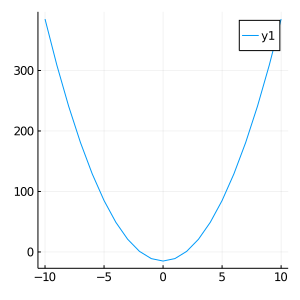

In [23]:
x = -10:10
plot(x, f.(x))

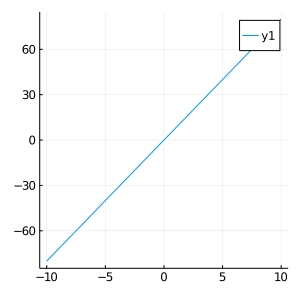

In [24]:
df(x) = 8x
x = -10:10
plot(x, df.(x))

In [25]:
a, b = bracket_sign_change(df, -10, -5)

(-17.5, 2.5)

In [35]:
@time aopt, bopt = bisection(df, a, b, 0.000001)

  0.000007 seconds (5 allocations: 128 bytes)


(0.0, 0.0)

In [27]:
x_opt = (aopt + bopt)/2

0.0

In [29]:
iter = log(abs(b-a)/0.0001)

12.206072645530174

In [33]:
(iter * 20)/60

4.068690881843391